# Cousera Capstone Project
- Codeset to accomplish the Cousera Capstone Project
- Work in progress and often some cells used to play with data as exploration 
## Methods
- To be updated as accomplished
## Outputs
-To be updated as accomplished

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print('Hello Capstone Project Course')

Hello Capstone Project Course


In [33]:
# Read in data
df = pd.read_csv(r'C:\*\*\*\*\Cousera\Capstone\Data-Collisions.csv',header =0)

In [34]:
# Counts for different combinations of features to see how they compare in an intial comparison.
df.groupby(['SEVERITYDESC','SEVERITYCODE']).size().reset_index().rename(columns={0:'count'})

,SEVERITYDESC,SEVERITYCODE,count
0,Injury Collision,2,58188
1,Property Damage Only Collision,1,136485


In [35]:
# Find column names for those with less than 25% data coverage; can repeat for less than 95%
qn = pd.DataFrame((df.count()/len(df)) < .25)
print(qn[qn[0]])

0
EXCEPTRSNDESC   True
INATTENTIONIND  True
PEDROWNOTGRNT   True
SPEEDING        True


<function matplotlib.pyplot.show(*args, **kw)>

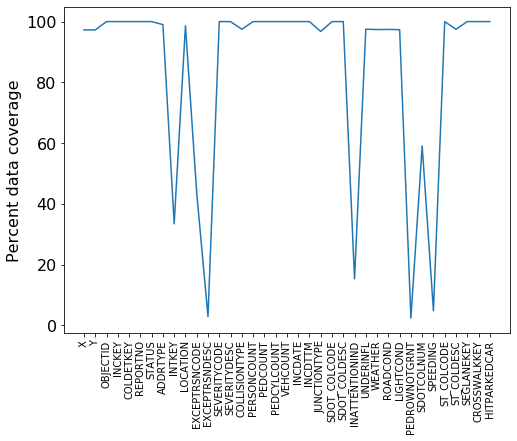

In [36]:
# Figure for percentage of data coverage for each column
plt.figure(figsize=(8,6))
plt.plot(df.count()/len(df)*100)
plt.yticks(fontsize = 16)
plt.ylabel('Percent data coverage',fontsize = 16)
plt.xticks(rotation = 90)
plt.show

In [37]:
# List of columns being kept within the analysis and drop the other columns not being used
keep = pd.Series(['INCKEY', 'ADDRTYPE', 'SEVERITYCODE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'SDOT_COLCODE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR','INATTENTIONIND', 'SPEEDING', 'PEDROWNOTGRNT', 'INCDATE'])
qqn = df.columns.isin(keep)
df= df.drop(df[df.columns[~qqn]],1)

In [38]:
# Fill in blanks in columns with N to indicate no
values = {'INATTENTIONIND': 'N', 'PEDROWNOTGRNT': 'N', 'SPEEDING': 'N'}
df.fillna(value=values, inplace=True)
# Drop labels that are not fully filled out with data.
df.dropna(inplace=True)

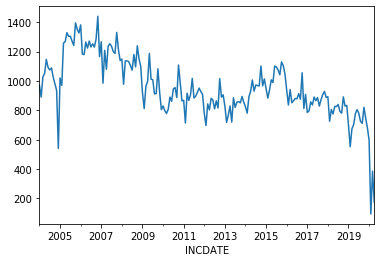

In [50]:
dft= df
dft.index = pd.to_datetime(dft['INCDATE'])
dft.resample('D').count()
g = dft.groupby(pd.Grouper(freq='M')).size()
g.plot()